# Hypothesis 2

Find linear regression and logistic regression model with best hyperparameters

1. Rename this notebook from `H2.ipynb` to `2_{Name}_{Surname}.ipynb`
2. You should use dataset from `H1`: `1_{Name}_{Surname}.csv` and `1_{Name}_{Surname}_test.csv`
2. Fit `3` linear models for regression target `__price_doc`: Linear regression, Lasso, Ridge
    - Find optimal regularization coefficient for each model (select more than 10+ experiments for each model)
3. Fit `3` logistic regression models for target `__churn`: Logistic Regression without regularization, Log Reg + L1, Log Reg + L2
    - Find optimal regularization coefficient for each model (select more than 10+ experiments for each model)
4. Fill table below with result obtained in experiments (Please hold this table in the top of notebook)
5. The results of the best models should be saved in the following columns:
    - best_regression.predict(): `__price_predict`
    - best_classification.predict_proba(): `__churn_prob`
    - algorithm: `__priority`
6. Send this notebook and preprocessed test dataset in a private message in telegram.


## HOW ESTIMATE QUALITY and SELECT BEST MODEL (Step by step guide)

- Select one target and work with it, then repeat this procedure with another target
- For each model and hyperparameters estimate quality (see the pseudo-code below)
```python
# Fit your model on train (NOT train_all) and score on valid dataset
model = ...some model...
model.fit(train.drop(list_targets, axis=1), y_train_...)

# Predict on train and valid
y_pred_train = model.predict(train) or predict_proba(train)[:, 1]
y_pred_valid = model.predict(valid) or predict_proba(valid)[:, 1]

# Estimate quality on train and valid
# Put this quality to table with metrics
score_train = metric_for_...(y_train_..., y_pred_train)
score_valid = metric_for_...(y_valid_..., y_pred_valid)
```
- Put metrics `score_train` and `score_valid` in table below for this model
- **Repeat this procedure more than 10+ experiments**
- Then, Select model with BEST score (based on `score_valid` metric)
- Fit your BEST model on TRAIN_ALL dataset and predict on TEST
```python
# Fit your BEST model on train_all (NOT train)
model = ...your BEST model...
model.fit(train_all.drop(list_targets, axis=1), y_train_all_...)

# Predict on train_all and TEST
train_all['__price_predict' or '__churn_prob'] = model.predict(train_all) or predict_proba(train_all)[:, 1]
test['__price_predict' or '__churn_prob'] = model.predict(test) or predict_proba(test)[:, 1]
```

## **IMPORTANT!!! `Name_Surname` should not change in other hypotheses**


## **IMPORTANT!!! Final Test dataset should have `2_{Name}_{Surname}_test.csv` name**


# Your metrics from experiments

In [315]:
import numpy as np
import pandas as pd

# table with metrics for all models
# Example:
# ('Lasso', '{alpha=0.1}', 'mean_squared_log_error', 0.1901, 0.1601)

scoring = pd.DataFrame([
    ('Linear Regression', '', 'mean_squared_log_error', -0.2000, -0.1970),
    ('Lasso', '{alpha= 0.5}', 'mean_squared_log_error', -0.1810, -0.1780),
    ('Ridge', '{alpha= 1000}', 'mean_squared_log_error', -0.1950, -0.1900),
    ('Logistic Regression', '{}', 'roc_auc_score', 0.8550, 0.8430),
    ('Log Reg + L1', '{alpha= 0.5}', 'roc_auc_score', 0.8560, 0.8550),
    ('Log Reg + L2', '{alpha= 0.1}', 'roc_auc_score', 0.8530, 0.8550),
], columns=['alg', 'hyperparametes', 'metric_name', 'score_train', 'score_valid'])

scoring

,alg,hyperparametes,metric_name,score_train,score_valid
0,Linear Regression,,mean_squared_log_error,-0.200,-0.197
1,Lasso,{alpha= 0.5},mean_squared_log_error,-0.181,-0.178
2,Ridge,{alpha= 1000},mean_squared_log_error,-0.195,-0.190
3,Logistic Regression,{},roc_auc_score,0.855,0.843
4,Log Reg + L1,{alpha= 0.5},roc_auc_score,0.856,0.855
5,Log Reg + L2,{alpha= 0.1},roc_auc_score,0.853,0.855


In [316]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 1000

# Your Name Surname
# !!! should not change in other hypotheses
NAME = "Belton_Manhica"

# train_all - all available data WITH Targets
train_all = pd.read_csv(f"/content/1_{NAME}_train.csv", low_memory=False)
# test - data WITHOUT targets
test = pd.read_csv(f"/content/1_{NAME}_test.csv")

TRAIN_SHAPE, TEST_SHAPE = train_all.shape, test.shape
TRAIN_SHAPE, TEST_SHAPE

((20483, 128), (9183, 127))

## Split TRAIN_ALL dataset into 2 parts: TRAIN and VALID (validation)

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_percentage_error


def metric_for_price(y_true, y_pred):
    """ mean_squared_log_error. bigger is better """
    return round(-mean_squared_log_error(y_true=y_true, y_pred=y_pred), 3)


def metric_for_churn(y_true, y_score):
    """ roc_auc_score. bigger is better """
    return round(roc_auc_score(y_true=y_true, y_score=y_score), 3)


RANDOM_STATE = 42
train, valid = train_test_split(train_all, test_size=0.5, stratify=train_all['__churn'], random_state=RANDOM_STATE)
train.shape, valid.shape, test.shape

((10241, 128), (10242, 128), (9183, 127))

In [318]:
list_targets = ['__price_doc', '__churn']

y_train_churn = train['__churn']
y_valid_churn = valid['__churn']
y_train_all_churn = train_all['__churn']

y_train_price = train['__price_doc']
y_valid_price = valid['__price_doc']
y_train_all_price = train_all['__price_doc']

# YOUR WORK STARTS HERE

In [319]:
#Select continuous features for linear regression
continuous_features = list(set(train.dtypes[train.dtypes != 'object'].index.tolist())
                           - set(['__churn','__price_doc', 'Unnamed: 0'] ))

In [320]:
continuous_features

['total_trans_amt',
 'f_1_full_sq',
 'max_floor',
 'life_sq',
 'leisure_count_5000',
 'f_ecology_target___price_doc',
 'credit_limit',
 'public_transport_station_min_walk',
 'mkad_km',
 'f_income_category_target___churn',
 'f_thermal_power_plant_raion_yes',
 'f_card_category_target___price_doc',
 'cafe_count_1000_price_1000',
 'total_ct_chng_q4_q1',
 'f_big_market_raion_no',
 'detention_facility_km',
 'f_big_market_raion_yes',
 'f_product_type_target___churn',
 'f_1_sport_count_2000',
 'f_detention_facility_raion_no',
 'f_1_school_education_centers_top_20_raion',
 'f_marital_status_target___churn',
 'market_count_1500',
 'f_railroad_terminal_raion_no',
 'f_product_type_target___price_doc',
 'state',
 'f_oil_chemistry_raion_yes',
 'f_1_months_on_book',
 'f_cafe_sum_1000_min_price_avg',
 'f_railroad_1line_yes',
 'f_1_leisure_count_3000',
 'f_incineration_raion_yes',
 'contacts_count_12_mon',
 'avg_utilization_ratio',
 'f_marital_status_target___price_doc',
 'f_1_total_amt_chng_q4_q1',
 '

In [321]:
#Select the right feature vector for transformed features

X_train = train[[col for col in continuous_features if col.startswith('f_')]]
X_valid = valid[[ col for col in continuous_features if col.startswith('f_')]]
X_train_all = train_all[[col for col in continuous_features if col.startswith('f_')]]

X_test = test[[col for col in continuous_features if col.startswith('f_')]]


In [322]:
#create a list of tuples for the train and validation datasets
get_X_y = [
    ('train', X_train, train),
    ('valid', X_valid, valid)
]

In [323]:
#Run a linear regression (least squares)
from sklearn.linear_model import LinearRegression

#select the train dataset [index 0]
name, X_, y_ = get_X_y[0]

#create the model
reg_model = LinearRegression()

#fit the model
reg_model.fit(X_, y_['__price_doc'])

#get the train columns
train_columns = X_train.columns.tolist()

#Make predictions
for name, X_, y_ in get_X_y:

    value = reg_model.predict(X_)
    #convert all negative predictions to zero
    value[value < 0] = 0
    #append the values of the prediction
    y_['__price_pedict_ln'] = value


In [324]:
#Get feature importance
reg_importance = pd.Series(reg_model.coef_, index = train_columns  )
reg_importance

,0
f_1_full_sq,2.165091
f_ecology_target___price_doc,0.171157
f_income_category_target___churn,-0.014405
f_thermal_power_plant_raion_yes,0.232888
f_card_category_target___price_doc,0.008087
f_big_market_raion_no,-0.018228
f_big_market_raion_yes,0.018228
f_product_type_target___churn,0.007487
f_1_sport_count_2000,0.093292
f_detention_facility_raion_no,0.541442


<Axes: >

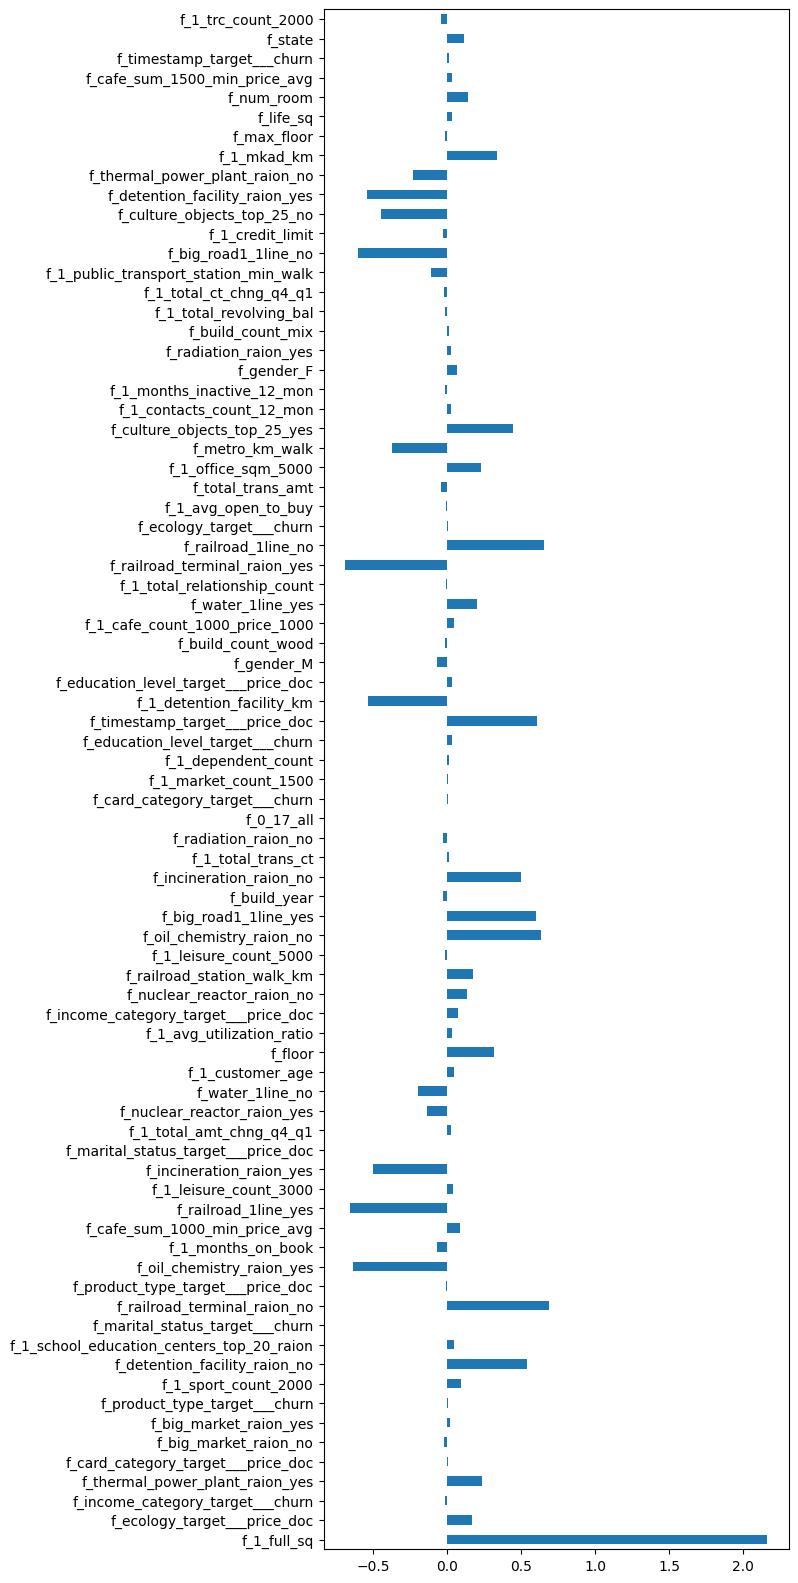

In [325]:
reg_importance.plot(kind='barh', figsize=(6, 20))

In [326]:
#score the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for name, X_, y_ in get_X_y:
  score = metric_for_price(y_true = y_['__price_doc'], y_pred = y_['__price_pedict_ln'])
  print(f'{name:10s}: {score:.4f}')


train     : -0.2000
valid     : -0.1970


Lasso Regression

In [327]:
#L1 regulation
from sklearn.linear_model import Lasso

#select the train data
name, X_, y_ = get_X_y[0]

#create a disctionary to store alpha and MLSE resulst for the validation dataset
valid_model_scores = {}

#chose different values for alpha
for alpha in [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 100, 1000]:
  #display each alpha value
  print(f'\n alpha {alpha}')
  reg_l1 = Lasso(alpha = alpha)
  reg_l1.fit(X_, y_['__price_doc'])

  train_columns = X_train.columns.tolist()

  for name, X_, y_ in get_X_y:
    value = reg_l1.predict(X_)
    value[value < 0] = 0
    y_['__price_pred_l1'] = value

  for name, X_, y_ in get_X_y:
      score = metric_for_price(y_true = y_['__price_doc'], y_pred = y_['__price_pred_l1'])
      print(f' {name:10s}: {score:.4f}')

    # Store the alpha and corresponding score in the dictionary
  valid_model_scores[alpha] = score


 alpha 0.001
 train     : -0.1990
 valid     : -0.1970

 alpha 0.01
 train     : -0.2050
 valid     : -0.2020

 alpha 0.1
 train     : -0.1980
 valid     : -0.1970

 alpha 0.5
 train     : -0.1810
 valid     : -0.1780

 alpha 1
 train     : -0.1790
 valid     : -0.1780

 alpha 2
 train     : -0.2170
 valid     : -0.2170

 alpha 10
 train     : -0.2490
 valid     : -0.2500

 alpha 100
 train     : -0.2490
 valid     : -0.2500

 alpha 1000
 train     : -0.2490
 valid     : -0.2500


In [328]:
lasso_importance = pd.Series(reg_l1.coef_, index = train_columns)
lasso_importance

,0
f_1_full_sq,0.0
f_ecology_target___price_doc,0.0
f_income_category_target___churn,-0.0
f_thermal_power_plant_raion_yes,0.0
f_card_category_target___price_doc,0.0
f_big_market_raion_no,0.0
f_big_market_raion_yes,-0.0
f_product_type_target___churn,-0.0
f_1_sport_count_2000,0.0
f_detention_facility_raion_no,-0.0


<Axes: >

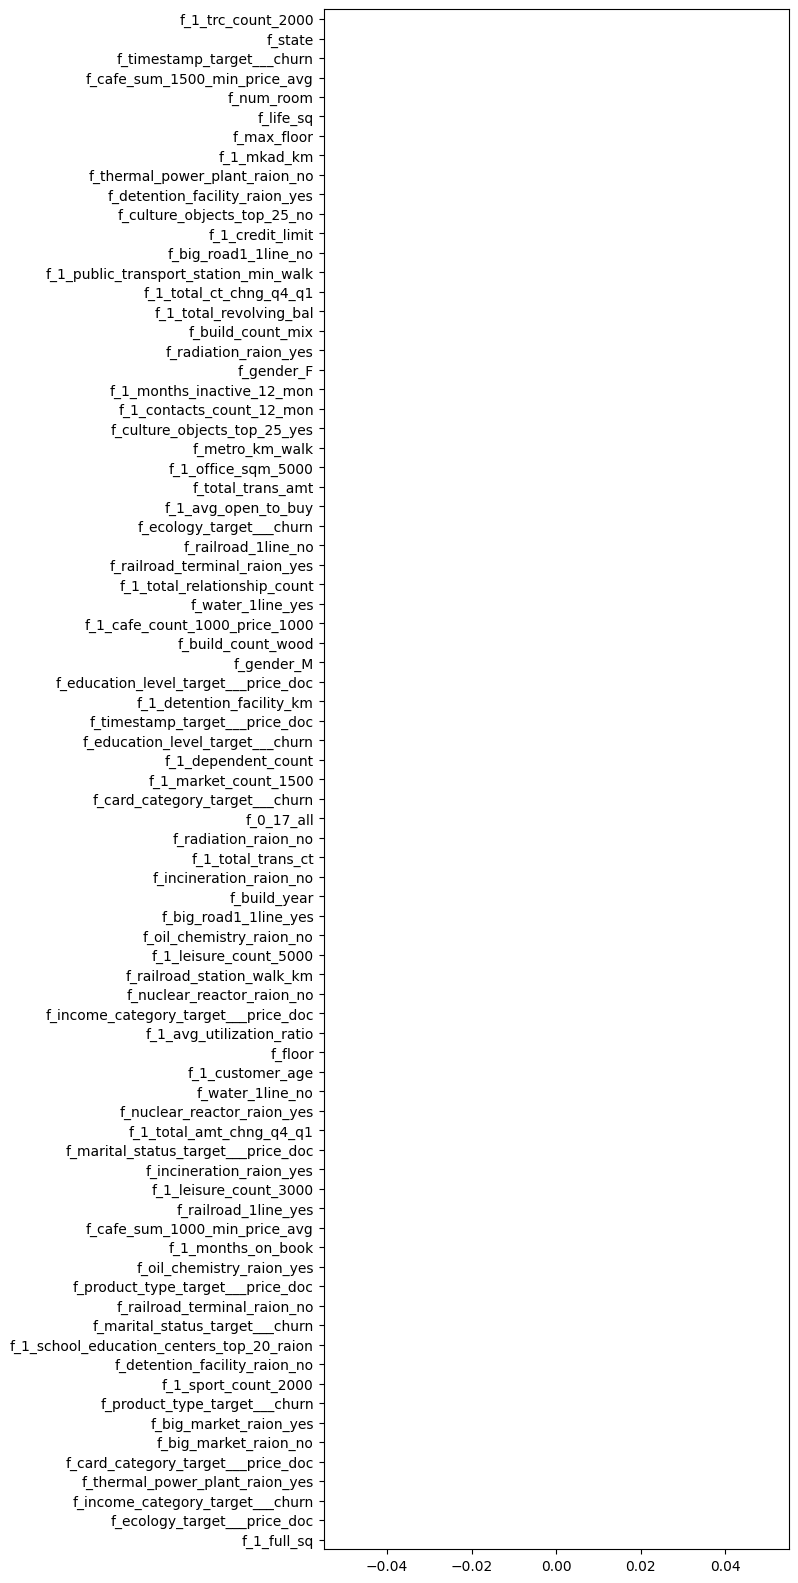

In [329]:
lasso_importance.plot(kind = 'barh', figsize = (6,20))

In [330]:
valid_model_scores

{0.001: -0.197,
 0.01: -0.202,
 0.1: -0.197,
 0.5: -0.178,
 1: -0.178,
 2: -0.217,
 10: -0.25,
 100: -0.25,
 1000: -0.25}

In [331]:
#Exctact the best model based on the alpha value of the validation dataset
best_alpha = max(valid_model_scores, key=valid_model_scores.get)
best_score = valid_model_scores[best_alpha]

# Print the results
print(f'Best Alpha: {best_alpha}, Score: {best_score:.3f}')

Best Alpha: 0.5, Score: -0.178


Ridge regression


In [332]:
#L2 regularization
from sklearn.linear_model import Ridge

name, X_, y_ = get_X_y[0]

valid_model_scores_l2 = {}

for alpha in [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 100, 1000]:
  print(f'\n alpha {alpha}')

  reg_l2 = Ridge( alpha = alpha, solver = 'svd')
  reg_l2.fit(X_, y_['__price_doc'])

  train_columns = X_train.columns.tolist()

  for name, X_, y_ in get_X_y:
    value = reg_l2.predict(X_)
    value[value <0] = 0
    y_['__price_pred_l2']= value

  for name, X_, y_ in get_X_y:
      score = metric_for_price(y_true = y_['__price_doc'], y_pred = y_['__price_pred_l2'])
      print(f' {name:10s}: {score:.4f}')

  valid_model_scores_l2[alpha] = score



 alpha 0.001
 train     : -0.2000
 valid     : -0.1970

 alpha 0.01
 train     : -0.2070
 valid     : -0.2030

 alpha 0.1
 train     : -0.2070
 valid     : -0.2030

 alpha 0.5
 train     : -0.2070
 valid     : -0.2030

 alpha 1
 train     : -0.2070
 valid     : -0.2030

 alpha 2
 train     : -0.2070
 valid     : -0.2030

 alpha 10
 train     : -0.2070
 valid     : -0.2030

 alpha 100
 train     : -0.2050
 valid     : -0.2010

 alpha 1000
 train     : -0.1950
 valid     : -0.1900


In [333]:
Ridge_importance= pd.Series(reg_l2.coef_ , index = train_columns)
Ridge_importance


,0
f_1_full_sq,1.920866
f_ecology_target___price_doc,0.220081
f_income_category_target___churn,-0.019329
f_thermal_power_plant_raion_yes,-0.069357
f_card_category_target___price_doc,0.007248
f_big_market_raion_no,-0.007696
f_big_market_raion_yes,0.007696
f_product_type_target___churn,-0.003547
f_1_sport_count_2000,0.162478
f_detention_facility_raion_no,0.223691


<Axes: >

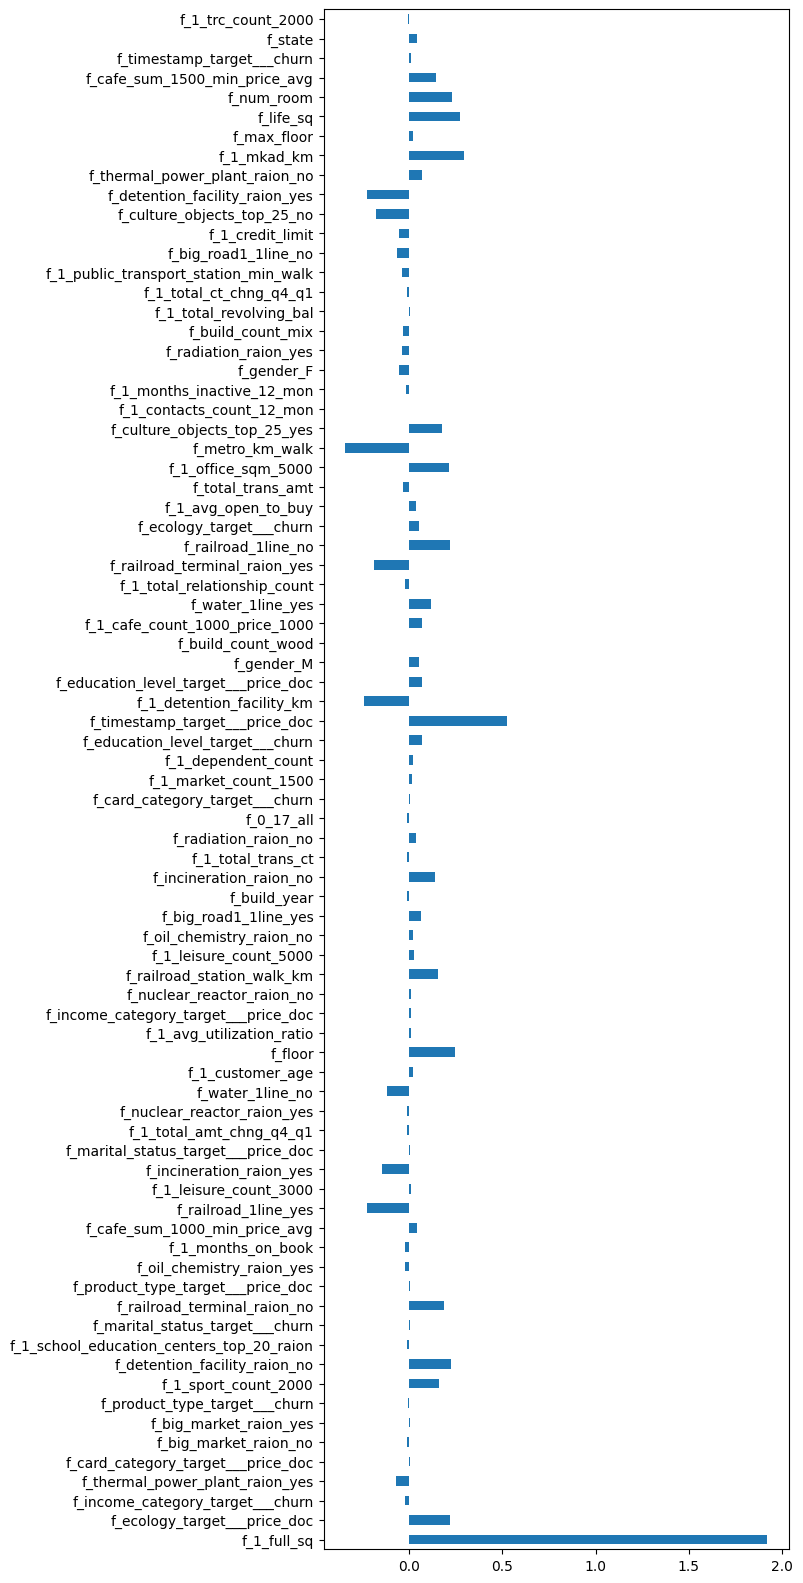

In [334]:
Ridge_importance.plot(kind = 'barh', figsize = (6, 20))

In [335]:
valid_model_scores_l2

best_alpha = max(valid_model_scores_l2, key=valid_model_scores_l2.get)
best_score = valid_model_scores_l2[best_alpha]

# Print the results
print(f'Best Alpha: {best_alpha}, Score: {best_score:.3f}')

Best Alpha: 1000, Score: -0.190


LOGISTIC REGRESSION

In [336]:
from sklearn.linear_model import LogisticRegression

name, X_, y_ = get_X_y[0]
log_model = LogisticRegression(penalty= None, max_iter= 1000)
log_model.fit(X_, y_['__churn'])

for name, X_, y_ in get_X_y:
  prob = log_model.predict_proba(X_)
  y_['__churn_prob_log'] = prob[:,1]

In [337]:
prob

array([[9.98770554e-01, 1.22944550e-03],
       [9.35528595e-01, 6.44714055e-02],
       [9.95019194e-01, 4.98080585e-03],
       ...,
       [9.99914817e-01, 8.51828295e-05],
       [9.91861960e-01, 8.13803980e-03],
       [9.99967709e-01, 3.22908062e-05]])

In [338]:
#get the model predictions
threshold = 0.5

for name, X_, y_ in get_X_y:
  y_['__churn_threshold'] = threshold
  y_['__churn_pred'] = (y_['__churn_prob_log'] > y_['__churn_threshold']).astype(int)

In [339]:
#compare the predictions with the actual value
train[['__churn_prob_log','__churn_threshold', '__churn_pred', '__churn']].sample(20)

,__churn_prob_log,__churn_threshold,__churn_pred,__churn
2236,6.837976e-02,0.5,0,0
5731,2.101652e-04,0.5,0,0
12358,6.482098e-01,0.5,1,0
3625,3.364201e-02,0.5,0,0
13275,3.510271e-09,0.5,0,0
2183,1.575930e-03,0.5,0,0
966,4.355775e-03,0.5,0,0
9696,1.412918e-02,0.5,0,0
8975,2.557532e-01,0.5,0,1
6817,4.315890e-04,0.5,0,0


In [340]:
#get the  model intercept
log_model.intercept_

array([-0.73362979])

In [341]:
#get the model coeficients
log_model.coef_

array([[ 7.59428297e-02, -3.52583177e-02,  7.72047764e-03,
        -2.18080625e-01,  5.90300242e-02, -3.63906679e-01,
        -3.69723113e-01,  2.60604695e-03,  6.55369998e-03,
        -2.56493462e-01,  1.74236299e-03,  3.14400223e-02,
        -3.47001599e-01, -2.60604702e-03, -4.23108935e-01,
        -1.27583836e-01,  1.19356147e-02, -1.03817744e-02,
         2.45292534e-04, -4.00986058e-01,  3.14400223e-02,
        -1.70392956e-01, -6.28484008e-01, -2.99956663e-01,
        -6.44273642e-02,  5.75362130e-02, -9.88711360e-02,
         2.85378139e-01, -1.05145784e-01,  5.29311259e-02,
         7.98534359e-03, -3.10520857e-01, -5.16116405e-01,
        -2.73319321e-03, -3.32643734e-01, -6.69143469e-01,
        -3.88695090e-01,  6.19158417e-02,  5.90300242e-02,
         1.65051850e-02,  1.60471163e-01,  7.08161591e-02,
         8.19999972e-02, -6.09090897e-02,  7.08161591e-02,
        -9.58995249e-01,  1.09624721e-02, -1.48644942e-02,
        -4.33673129e-01, -4.17294913e-01, -3.86628193e-0

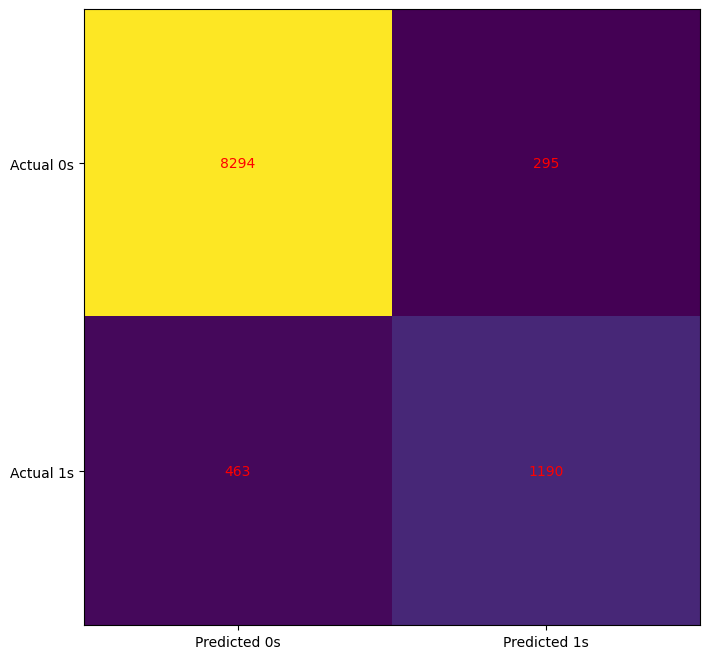

In [342]:
#create the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(y_true =valid['__churn'], y_pred = valid['__churn_pred'])

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [343]:
#get classification report
print(classification_report(y_['__churn'], log_model.predict(X_)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8589
           1       0.80      0.72      0.76      1653

    accuracy                           0.93     10242
   macro avg       0.87      0.84      0.86     10242
weighted avg       0.92      0.93      0.92     10242



In [344]:
#get the score for the model
for name, X_, y_ in get_X_y:
  score = metric_for_churn(y_true = y_['__churn'], y_score = y_['__churn_pred'])
  print(f' {name:10s}: {score:.4f}')


 train     : 0.8550
 valid     : 0.8430


Logistic + R1 regularization

In [345]:
#L1 regularization for logistic regression
name, X_, y_ = get_X_y[0]

valid_model_scores_logl1 = {}

for c in [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 100, 1000]:
  print(f'\n C = {c}')
  log_l1_model = LogisticRegression( solver = 'liblinear',penalty= 'l1' ,C = c, random_state = 0 )
  log_l1_model.fit(X_, y_['__churn'])

  for name, X_, y_ in get_X_y:
    prob = log_l1_model.predict_proba(X_)
    y_['__churn_prob_logL1'] = prob[:,1]
    y_['__churn_pred_l1'] = (y_['__churn_prob_logL1'] > y_['__churn_threshold']).astype(int)

    score = metric_for_churn(y_true = y_['__churn'], y_score = y_['__churn_pred_l1'])
    print(f' {name:10s}: {score:.4f}')

  valid_model_scores_logl1[c] = score



 C = 0.001
 train     : 0.5090
 valid     : 0.5100

 C = 0.01
 train     : 0.8400
 valid     : 0.8370

 C = 0.1
 train     : 0.8550
 valid     : 0.8530

 C = 0.5
 train     : 0.8560
 valid     : 0.8550

 C = 1
 train     : 0.8570
 valid     : 0.8550

 C = 2
 train     : 0.8560
 valid     : 0.8550

 C = 10
 train     : 0.8550
 valid     : 0.8550

 C = 100
 train     : 0.8550
 valid     : 0.8550

 C = 1000
 train     : 0.8550
 valid     : 0.8550


In [346]:
#check on alpha scores
valid_model_scores_logl1

{0.001: 0.51,
 0.01: 0.837,
 0.1: 0.853,
 0.5: 0.855,
 1: 0.855,
 2: 0.855,
 10: 0.855,
 100: 0.855,
 1000: 0.855}

In [347]:
#select the best alpha based on the validation dataset

best_alpha = max(valid_model_scores_logl1, key=valid_model_scores_logl1.get)
best_score = valid_model_scores_logl1[best_alpha]

# Print the results
print(f'Best Alpha: {best_alpha}, Score: {best_score:.3f}')

Best Alpha: 0.5, Score: 0.855


In [348]:
#L2 regularization for logistic regression
name, X_, y_ = get_X_y[0]

valid_model_scores_logl2 = {}

for c in [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 100, 1000]:
  print(f'\n C = {c}')
  log_l2_model = LogisticRegression( solver = 'newton-cholesky',penalty= 'l2' ,C = c, random_state = 0 )
  log_l2_model.fit(X_, y_['__churn'])

  for name, X_, y_ in get_X_y:
    prob = log_l2_model.predict_proba(X_)
    y_['__churn_prob_logL2'] = prob[:,1]
    y_['__churn_pred_l2'] = (y_['__churn_prob_logL2'] > y_['__churn_threshold']).astype(int)
    y_['__churn_pred_l2_'] = log_l2_model.predict(X_)

    score = metric_for_churn(y_true = y_['__churn'], y_score = y_['__churn_pred_l2'])
    print(f' {name:10s}: {score:.4f}')

  valid_model_scores_logl2[c] = score


 C = 0.001
 train     : 0.7130
 valid     : 0.7130

 C = 0.01
 train     : 0.8320
 valid     : 0.8390

 C = 0.1
 train     : 0.8530
 valid     : 0.8550

 C = 0.5
 train     : 0.8540
 valid     : 0.8550

 C = 1
 train     : 0.8550
 valid     : 0.8550

 C = 2
 train     : 0.8550
 valid     : 0.8550

 C = 10
 train     : 0.8550
 valid     : 0.8550

 C = 100
 train     : 0.8550
 valid     : 0.8550

 C = 1000
 train     : 0.8550
 valid     : 0.8550


In [349]:
#select the best alpha based on the validation dataset

best_alpha = max(valid_model_scores_logl2, key=valid_model_scores_logl2.get)
best_score = valid_model_scores_logl2[best_alpha]

# Print the results
print(f'Best Alpha: {best_alpha}, Score: {best_score:.3f}')

Best Alpha: 0.1, Score: 0.855


In [350]:
valid_model_scores_logl2

{0.001: 0.713,
 0.01: 0.839,
 0.1: 0.855,
 0.5: 0.855,
 1: 0.855,
 2: 0.855,
 10: 0.855,
 100: 0.855,
 1000: 0.855}

In [351]:
#select the best alpha based on the validation dataset

best_alpha = max(valid_model_scores_logl1, key=valid_model_scores_logl1.get)
best_score = valid_model_scores_logl1[best_alpha]

# Print the results
print(f'Best Alpha: {best_alpha}, Score: {best_score:.3f}')

Best Alpha: 0.5, Score: 0.855


**MODEL SELECTION**

Based on the scoring table, the best regression will be the one with the lest negative MLSE. In this case, we pick Laso



```
# 'Lasso', '{alpha= 0.5}', 'mean_squared_log_error', -0.1810, -0.1780
```





The best classification will be the one with the highest ROC AUC Score. Based on the scoring table, both  Log Reg + L1 and  Log Reg + L2 had the same score for the validation dataser, we can pick both. However, we can pick  Log Reg + L1  since the score on the train set was better for this classification.



```
# 'Log Reg + L1', '{alpha= 0.5}', 'roc_auc_score', 0.8560, 0.8550
```



Fit the best models to the train_all and predict it in the test dataset

In [353]:
#create a list of tuples for the train_all and test datasets
get_X_y_test = [
    ('train_all', X_train_all, train_all),
    ('test', X_test, test)
]

In [354]:
#select the train_all data
name, X_, y_ = get_X_y_test[0]

#fit the data
best_regression = Lasso(alpha = 0.5)
best_regression.fit(X_, y_['__price_doc'])

train_columns = X_train_all.columns.tolist()

for name, X_, y_ in get_X_y_test:
  value = best_regression.predict(X_)
  value[value < 0] = 0
  y_['__price_predict'] = value

<Axes: >

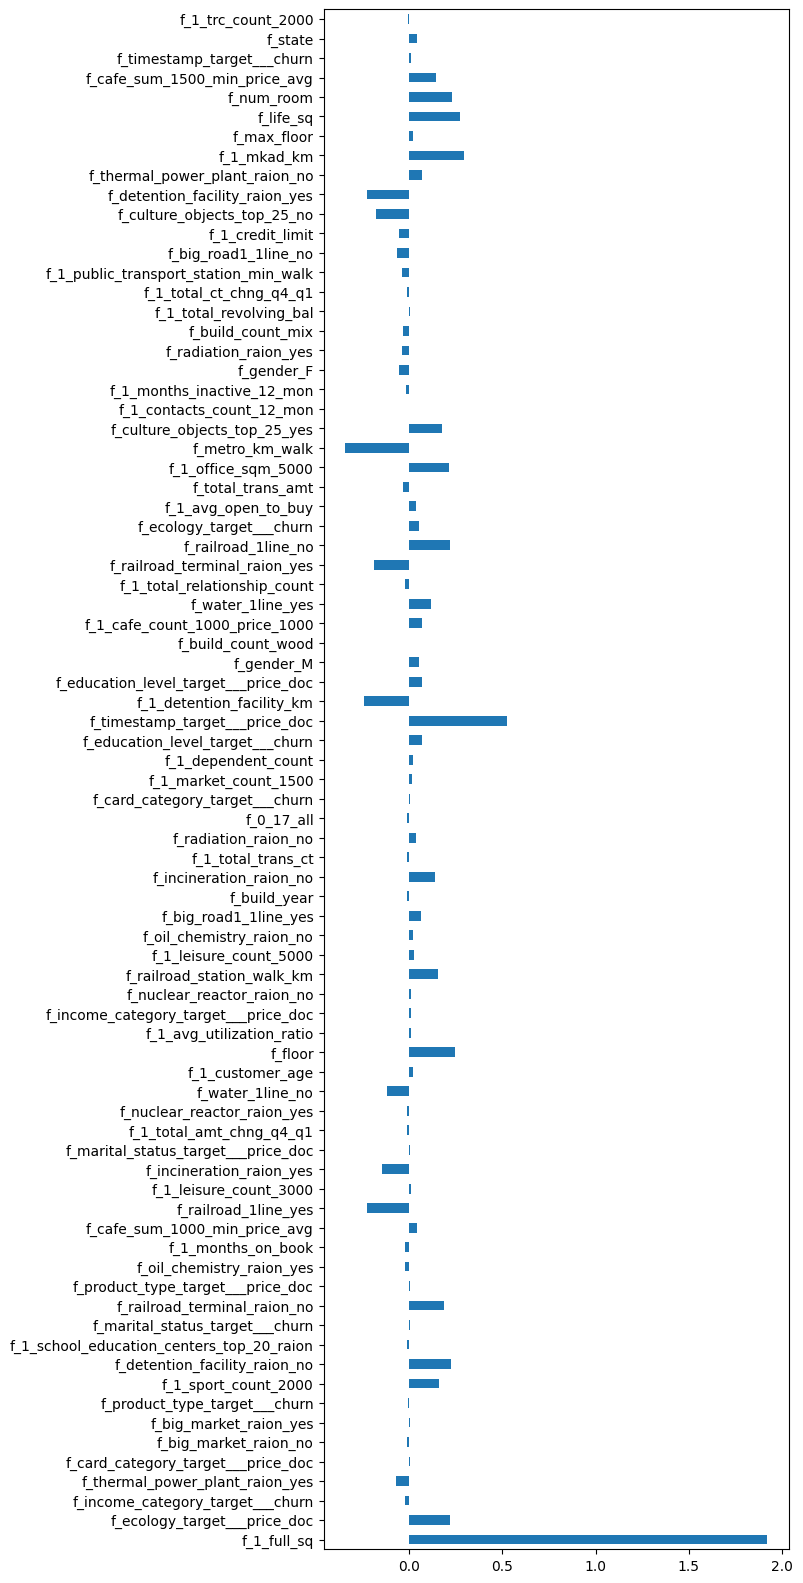

In [355]:
Best_model_importance= pd.Series(reg_l2.coef_ , index = train_columns)
Best_model_importance.plot(kind = 'barh', figsize = (6, 20))

In [356]:
#fit and predict the best classification
name, X_, y_ = get_X_y_test[0]

best_classificatio = LogisticRegression( solver = 'liblinear',penalty= 'l1' ,C = c, random_state = 0 )
best_classificatio.fit(X_, y_['__churn'])

threshold = 0.5

for name, X_, y_ in get_X_y_test:
    prob = best_classificatio.predict_proba(X_)
    y_['__churn_prob'] = prob[:,1]

    y_['__churn_threshold'] = threshold
    y_['__churn_pred'] = (y_['__churn_prob'] > y_['__churn_threshold']).astype(int)

# YOUR WORK IS DONE (Create submission)

In [357]:
metric_for_churn(y_train_all_churn, train_all['__churn_prob'])

0.967

In [358]:
metric_for_price(y_train_all_price, train_all['__price_predict'])

-0.178

In [359]:
def alg1(x):
    """
    Algorithm version 1
    """
    return x['__price_predict']

# column __price_predict must be in train and test dataset
train_all['__priority'] = train_all.apply(alg1, axis=1)
test['__priority'] = test.apply(alg1, axis=1)

In [361]:
# this columns must be in dataset
prediction_columns = ['__price_predict', '__churn_prob', '__priority']

if train_all.shape[0] != TRAIN_SHAPE[0]:
    raise ValueError(f'Incorrect train file shape. Original {TRAIN_SHAPE[0]}. {train_all.shape[0]} are given')

for col in prediction_columns:
    if col not in train_all.columns.tolist():
        raise ValueError(f"{col} does not exist in train dataset")

# index must be True
train_all.to_csv(f'{save_dir}' + NAME + '.csv', index=True)

if test.shape[0] != TEST_SHAPE[0]:
    raise ValueError(f'Incorrect test file shape. Original {TEST_SHAPE[0]}. {test.shape[0]} are given')

for col in prediction_columns:
    if col not in test.columns.tolist():
        raise ValueError(f"{col} does not exist in test dataset")

# index must be True
test.to_csv(f'{save_dir}' + NAME + '_test.csv', index=True)
print(train_all.shape, test.shape)

(20483, 133) (9183, 132)
